In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

Import Data

In [2]:
df = pd.read_csv ('/content/newaxis.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/newaxis.csv'

Split Train and Test dataset

In [ ]:
X_train = df[:int(df.shape[0]*0.75)]
X_test = df[int(df.shape[0]*0.75):]




Exponential Moving Average

In [ ]:
df = df['Adj_Close'].to_frame()

for i in range(1,31):
  df['EWMA',i] = df['Adj_Close'].ewm(span=i).mean()
  Y_train = df[:int(df.shape[0]*0.75)]



Root Mean Square Error

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

result_test = []
for i in range(1,31):
  rms_test = mean_squared_error(df['Adj_Close'][924:len(df)], df['EWMA',i][924:len(df)])
  rms_test = sqrt(mean_squared_error(df['Adj_Close'][924:len(df)], df['EWMA',i][924:len(df)]))
  test = rms_test
  result_test.append(test)

print(result_test)




  
result_train = []
for i in range(1,31):
  rms_train = mean_squared_error(X_train['Adj_Close'], Y_train['EWMA',i])
  rms_train = sqrt(mean_squared_error(X_train['Adj_Close'], Y_train['EWMA',i]))
  train = rms_train
  result_train.append(train)

print(result_train)


  

[0.0, 5.260824485565279, 8.666424964318297, 11.381668201028756, 13.726665259082772, 15.832133776581546, 17.76329736751689, 19.557695405420382, 21.23957767106561, 22.8261043353596, 24.330256302369, 25.762309645429436, 27.130644142016546, 28.442225629889077, 29.702918833049395, 30.917705806226554, 32.090847637569205, 33.226009274238315, 34.326358645462435, 35.3946468434908, 36.43327376757697, 37.444342299655254, 38.42970326668914, 39.39099291253745, 40.32966423119019, 41.24701324109226, 42.14420107312757, 43.022272583110464, 43.88217207119826, 44.724756587460156]
[0.0, 3.599383037440989, 5.820841510021839, 7.473736693420375, 8.803720047272131, 9.924564645637293, 10.899937817791926, 11.769239827774372, 12.558391797801375, 13.28517088867448, 13.96215899603235, 14.598498294368914, 15.200989587931309, 15.774803124666185, 16.323950064286375, 16.85160141932066, 17.360307605325172, 17.852152092206488, 18.32886070528087, 18.79188065873882, 19.242438646812317, 19.681584242817156, 20.1102228448147

Ploting RMSE value for 1 to 30

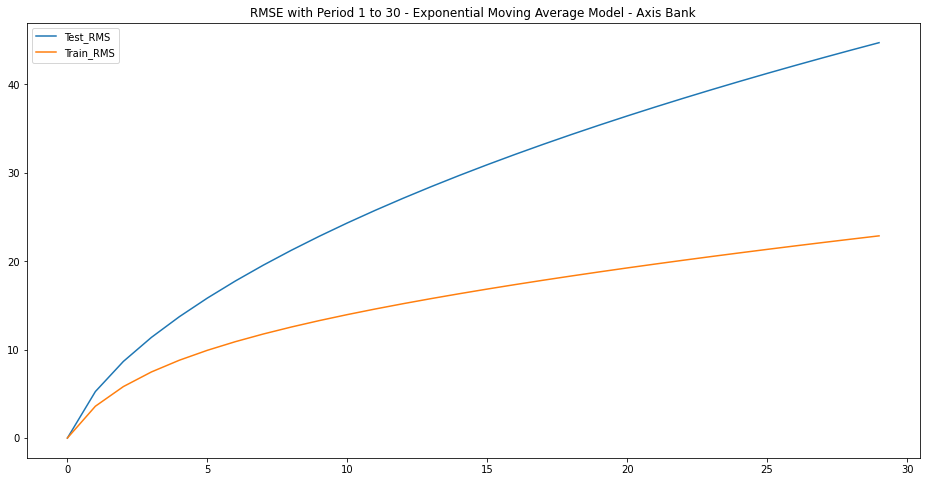

In [ ]:
x=result_test
y = result_train
plt.figure(figsize=[16,8])
plt.title('RMSE with Period 1 to 30 - Exponential Moving Average Model - Axis Bank')
plt.plot(x,label='Test_RMS')
plt.plot(y,label='Train_RMS')
plt.legend(loc=2)




Ploting Exponential Moving Average

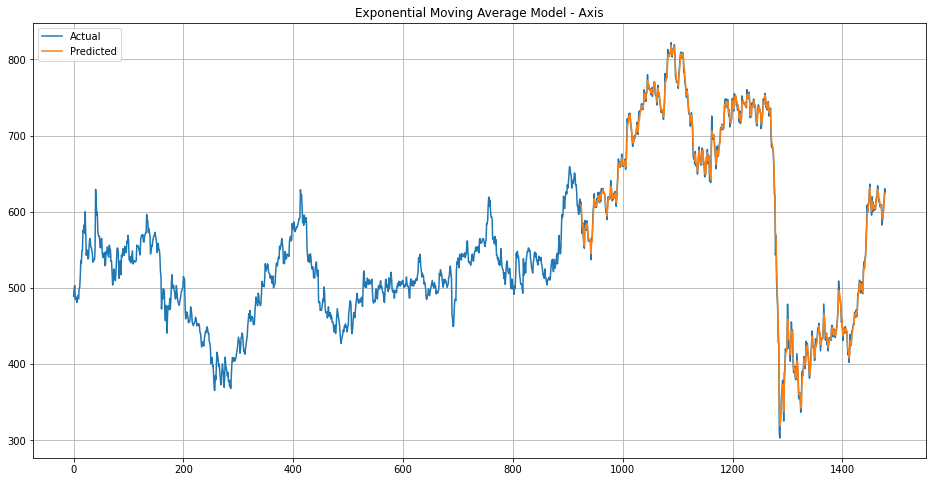

In [ ]:
plt.figure(figsize=[16,8])
plt.title('Exponential Moving Average Model - Axis')
plt.grid(True)
# df.set_index('Date',inplace=True)
plt.plot(df['Adj_Close'],label='Actual')
plt.plot(df['EWMA',2][924:len(df)],label='Predicted')
plt.legend(loc=2)